# Exploratory Data Analysis (EDA)

## Описание
В данном ноутбуке проводится исследовательский анализ синтетических данных,
имитирующих поведение пользователей Instagram.

Цель анализа — изучить основные паттерны пользовательской активности
и вовлечённости без построения предиктивных моделей.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set(style="whitegrid")


In [3]:
DATA_PATH = Path("../data/processed/instagram_usage_lifestyle_processed.csv")

df = pd.read_csv(DATA_PATH)
df.head()


,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score,activity_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83,1027.0
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,14.8,Photos,Fashion,Public,No,No,3,Free,1.43,6175.0
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67,10181.0
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,25.9,Stories,Tech,Private,No,No,1,Free,0.94,2052.0
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,13.1,Videos,Food,Public,Yes,No,0,Free,1.03,2427.0


In [4]:
df.shape

(1547896, 59)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 59 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1547896.0,773948.500000,446839.230477,1.00,386974.75,773948.5,1160922.25,1547896.00
age,1547896.0,38.985440,15.294528,13.00,26.00,39.0,52.00,65.00
exercise_hours_per_week,1547896.0,7.143480,3.994556,0.00,4.00,6.6,9.70,24.10
sleep_hours_per_night,1547896.0,6.999384,1.097098,3.00,6.30,7.0,7.70,10.00
perceived_stress_score,1547896.0,19.987738,11.832578,0.00,10.00,20.0,30.00,40.00
self_reported_happiness,1547896.0,5.499804,2.871232,1.00,3.00,5.0,8.00,10.00
body_mass_index,1547896.0,25.000837,3.976188,15.00,22.30,25.0,27.70,45.00
blood_pressure_systolic,1547896.0,124.491714,20.206989,90.00,107.00,124.0,142.00,159.00
blood_pressure_diastolic,1547896.0,79.500074,11.548740,60.00,70.00,79.0,90.00,99.00
daily_steps_count,1547896.0,8000.104562,89.397615,7566.00,7940.00,8000.0,8060.00,8473.00


## Первичный обзор данных

- Датасет содержит более 1 млн наблюдений и 50+ признаков.
- Присутствуют как числовые, так и категориальные переменные.
- В данных имеются пропущенные значения, что оправдывает этап очистки в ETL.
- Распределения некоторых числовых признаков имеют широкий диапазон значений.


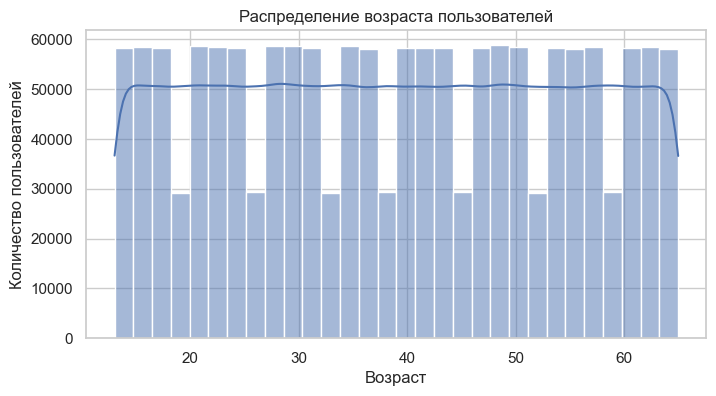

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.show()


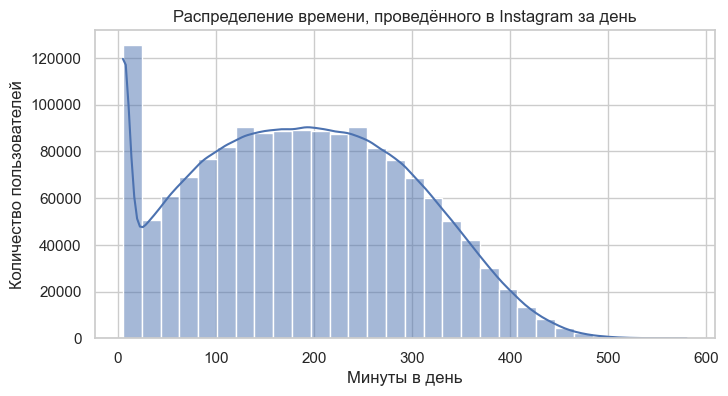

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df["daily_active_minutes_instagram"], bins=30, kde=True)
plt.title("Распределение времени, проведённого в Instagram за день")
plt.xlabel("Минуты в день")
plt.ylabel("Количество пользователей")
plt.show()

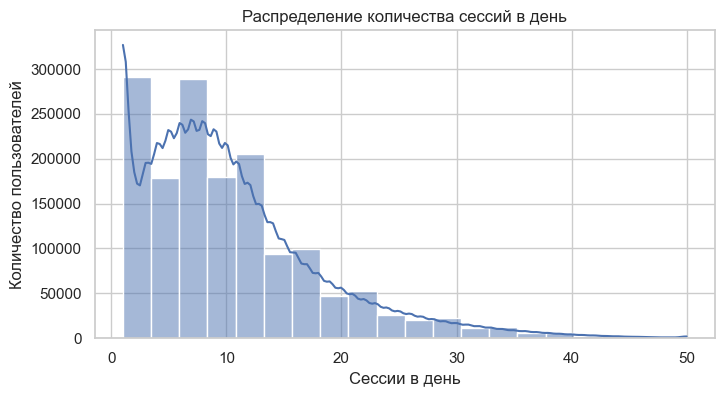

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df["sessions_per_day"], bins=20, kde=True)
plt.title("Распределение количества сессий в день")
plt.xlabel("Сессии в день")
plt.ylabel("Количество пользователей")
plt.show()


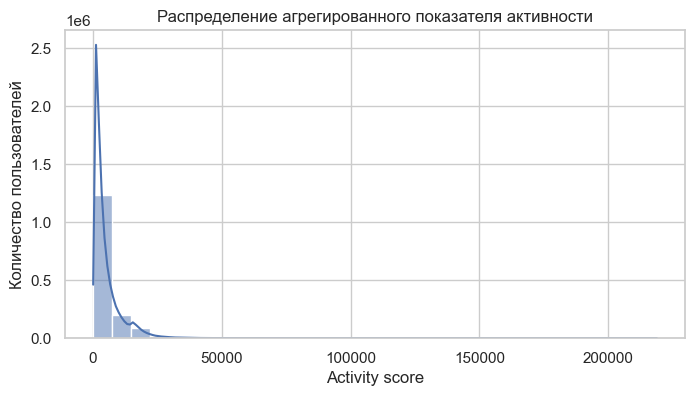

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df["activity_score"], bins=30, kde=True)
plt.title("Распределение агрегированного показателя активности")
plt.xlabel("Activity score")
plt.ylabel("Количество пользователей")
plt.show()


## Анализ распределений

- Возраст пользователей имеет близкое к нормальному распределение.
- Время, проводимое в Instagram, распределено неравномерно и имеет правостороннюю асимметрию.
- Большинство пользователей заходят в приложение несколько раз в день.
- Агрегированный показатель активности позволяет выделять пользователей с экстремально высокой вовлечённостью.


In [11]:
corr_columns = [
    "age",
    "daily_active_minutes_instagram",
    "sessions_per_day",
    "followers_count",
    "following_count",
    "activity_score",
    "user_engagement_score",
]

corr_df = df[corr_columns].corr()

corr_df


,age,daily_active_minutes_instagram,sessions_per_day,followers_count,following_count,activity_score,user_engagement_score
age,1.000000,-0.197867,-0.147064,-0.062550,-0.069581,-0.074716,0.111829
daily_active_minutes_instagram,-0.197867,1.000000,0.748179,0.066583,0.076232,0.096599,-0.529977
sessions_per_day,-0.147064,0.748179,1.000000,0.050213,0.057466,0.073327,-0.381209
followers_count,-0.062550,0.066583,0.050213,1.000000,0.717534,0.941630,-0.021386
following_count,-0.069581,0.076232,0.057466,0.717534,1.000000,0.909712,-0.023843
activity_score,-0.074716,0.096599,0.073327,0.941630,0.909712,1.000000,-0.034934
user_engagement_score,0.111829,-0.529977,-0.381209,-0.021386,-0.023843,-0.034934,1.000000


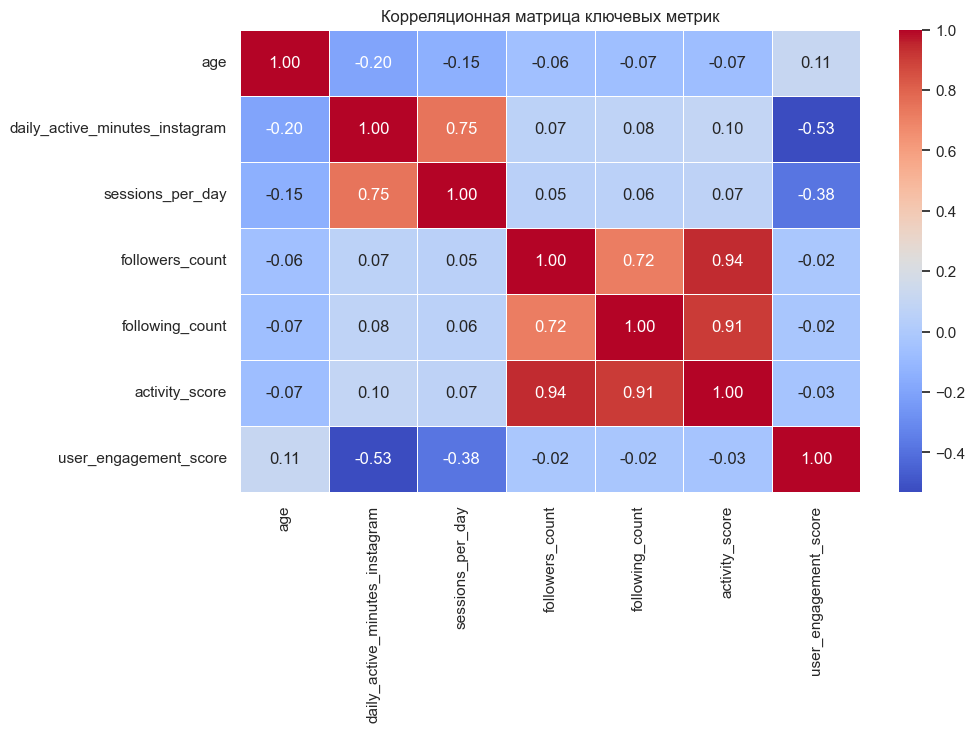

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Корреляционная матрица ключевых метрик")
plt.show()


## Анализ корреляций

- Агрегированный показатель активности ожидаемо коррелирует с базовыми метриками использования.
- Возраст демонстрирует слабую или умеренную связь с показателями активности.
- Показатели подписчиков и подписок вносят вклад в общий уровень вовлечённости.
- Сильных линейных зависимостей между большинством признаков не наблюдается.


In [13]:
df["activity_segment"] = pd.qcut(
    df["activity_score"],
    q=3,
    labels=["Low activity", "Medium activity", "High activity"]
)

df["activity_segment"].value_counts()


activity_segment
Low activity       516041
High activity      515936
Medium activity    515919
Name: count, dtype: int64

In [17]:
segment_stats = (
    df
    .groupby("activity_segment", observed=True)[
        [
            "daily_active_minutes_instagram",
            "sessions_per_day",
            "followers_count",
            "user_engagement_score",
        ]
    ]
    .mean()
)

segment_stats


,daily_active_minutes_instagram,sessions_per_day,followers_count,user_engagement_score
activity_segment,,,,
Low activity,170.230860,9.345827,418.381439,1.762816
Medium activity,192.633051,10.573877,1233.354410,1.606514
High activity,201.829273,11.067413,4830.215969,1.564571


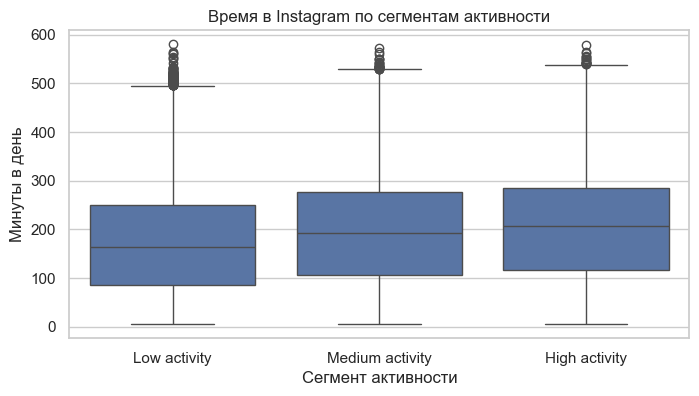

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x="activity_segment",
    y="daily_active_minutes_instagram"
)
plt.title("Время в Instagram по сегментам активности")
plt.xlabel("Сегмент активности")
plt.ylabel("Минуты в день")
plt.show()


## Сегментация пользователей

- Пользователи с высокой активностью проводят существенно больше времени в Instagram.
- Сегменты различаются не только по времени использования, но и по уровню вовлечённости.
- Простая сегментация позволяет выделить группы пользователей с разным поведением без применения ML-моделей.
